Exploration

In [5]:
data <- read.csv(file.path("..", "data", "training_data.csv"))

In [6]:
#predictors, type of data
data

Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,...,0,0,1,0,1,0,1,0,1,0
high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,...,0,0,0,0,0,0,0,0,0,0
high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,...,0,0,1,0,1,1,1,0,1,1
high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,...,0,0,0,0,0,0,0,0,0,0
low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,...,0,0,0,0,0,0,0,0,0,0
high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,...,0,0,0,0,1,0,1,0,1,0
low,56,FALSE,116.0,170.22,7.401,15.349,22.745,16.261,25.285,...,0,0,0,0,1,0,0,0,1,0
low,52,FALSE,25.0,114.26,4.395,12.741,24.952,14.853,29.737,...,0,0,0,0,0,0,0,0,0,0
low,53,TRUE,355.0,268.30,7.666,21.304,36.025,21.614,39.950,...,0,0,1,0,1,1,1,1,1,1
low,1,FALSE,68.4,152.26,9.516,9.911,16.342,11.250,17.920,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dim(data) #708 observations pour 4872 predictors
#str(data) #a lot of diffent sorts of predictors : int, bool, num...
#names(data)
data1 <- na.omit(data)
dim(data1) #Il n'y a pas l'air d'y avoir des lignes ou il y a que des NA ?? Jsp si ca veut dire ca ?

sum(colSums(apply(data,2,is.na))) #autre approche pour vérifier et avec juste colSums(apply(data,2,is.na)) on voit le détail de chaque colonne, on dirait effectivement qu'il n'y pas de NA

[1]  708 4872

[1]  708 4872

[1] 0

In [57]:
#Verify the dimension of the test and sample submission datas
data_test <- read.csv(file.path("..", "data", "test_data.csv"))
data_sub <- read.csv(file.path("..", "data", "sampleSubmission.csv"))
dim(data_test)
dim(data_sub)
#--> test data : the pleasantness is outside of the data
#--> sample submission : I don't know what it is ???
    #--->Je crois que c'est un exemple du format de fichier à rendre

[1]   68 4871

[1] 69  2

[1] 43.57345

[1] 16

[1] 0

[1] 432

[1] 98

,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
16,high,0,FALSE,52.5,130.26,4.824,13.456,26.28,15.307,30.946,...,0,0,0,0,0,0,0,0,0,0


,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
432,high,98,TRUE,143,170.28,5.676,16.171,29.607,17.762,34.156,...,0,0,0,0,1,0,0,0,1,0


,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
432,high,98,TRUE,143.0,170.28,5.676,16.171,29.607,17.762,34.156,...,0,0,0,0,1,0,0,0,1,0
555,low,97,TRUE,86.9,156.30,5.042,15.983,30.163,18.069,35.361,...,0,0,0,0,0,0,0,0,1,0
612,low,96,TRUE,89.3,144.24,5.548,13.644,25.723,15.000,29.740,...,0,0,0,0,0,0,0,0,0,0
219,low,95,TRUE,116.0,142.22,5.926,13.117,23.840,14.239,27.325,...,0,0,0,0,0,0,0,0,0,0
553,low,95,TRUE,160.0,180.22,7.209,15.305,25.284,15.932,28.119,...,0,0,0,0,1,0,1,0,1,0
314,low,93,TRUE,119.0,116.08,9.673,7.913,13.076,7.341,13.668,...,0,0,0,0,0,0,0,0,0,0
468,low,92,TRUE,115.0,150.19,7.152,13.064,21.073,13.716,23.495,...,0,0,0,0,0,0,0,0,0,0
627,low,92,TRUE,103.0,138.18,6.909,12.064,20.073,12.716,22.495,...,0,0,0,0,0,0,0,0,0,0
315,high,90,TRUE,126.0,150.19,7.152,13.064,21.073,13.716,23.495,...,0,0,0,0,0,0,0,0,0,0
528,high,90,FALSE,151.0,154.28,5.320,15.456,28.280,17.307,32.946,...,0,0,0,0,0,0,0,0,1,0


,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
464,high,0,FALSE,136.0,194.27,8.447,15.251,23.149,16.364,25.415,...,0,0,0,0,1,0,1,0,1,0
484,low,0,FALSE,71.5,86.10,7.175,7.010,12.305,7.193,13.664,...,0,0,0,0,0,0,0,0,0,0
524,low,0,FALSE,23.1,88.17,4.898,8.876,17.629,10.023,20.701,...,0,0,0,0,0,0,0,0,0,0
573,high,0,FALSE,61.1,118.22,6.954,9.536,16.822,10.909,19.205,...,0,0,0,0,0,0,0,0,0,0
579,low,0,FALSE,112.0,136.16,7.564,11.537,18.189,11.955,20.080,...,0,0,0,0,0,0,0,0,0,0
593,high,0,FALSE,41.4,100.18,5.273,9.876,18.629,11.023,21.701,...,0,0,0,0,0,0,0,0,0,0
620,low,0,FALSE,61.1,118.22,6.954,9.536,16.822,10.909,19.205,...,0,0,0,0,0,0,0,0,0,0
631,high,0,FALSE,110.0,172.30,5.384,16.698,31.491,18.523,36.571,...,0,0,0,0,1,0,0,0,1,0
639,high,0,FALSE,66.5,102.15,6.009,9.064,17.073,9.716,19.495,...,0,0,0,0,0,0,0,0,0,0
683,high,0,FALSE,173.0,214.31,7.654,17.019,28.244,18.341,31.455,...,0,0,1,0,1,0,1,0,1,0


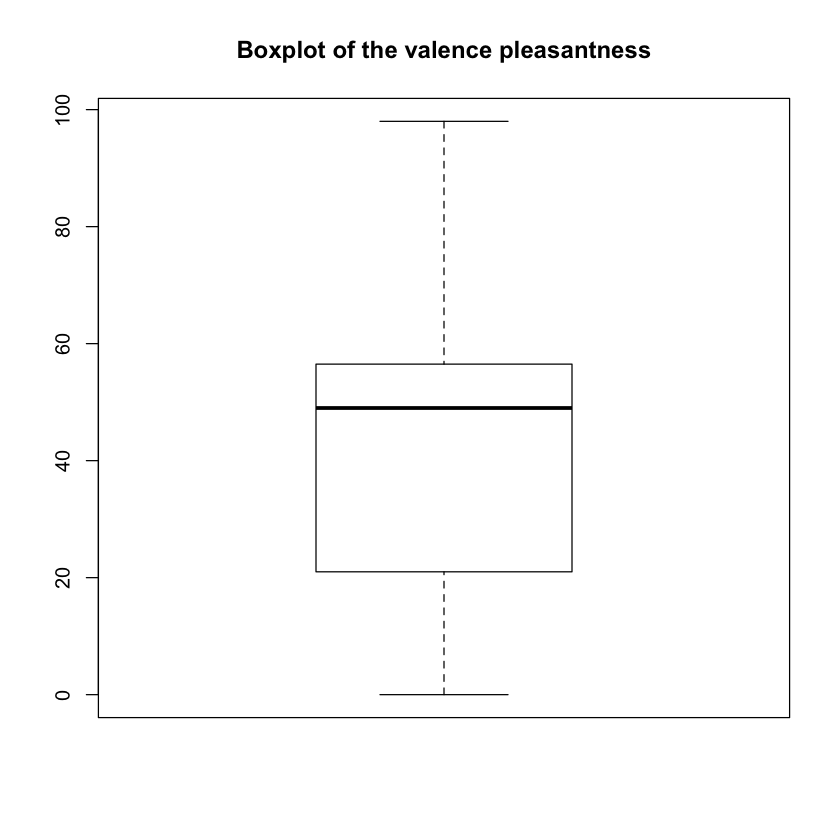

In [52]:
#str(data$VALENCE.PLEASANTNESS)
mean(data$VALENCE.PLEASANTNESS) # mean value = 43.57
boxplot(data$VALENCE.PLEASANTNESS, main = 'Boxplot of the valence pleasantness')
which.min(data$VALENCE.PLEASANTNESS) 
data[16,]$VALENCE.PLEASANTNESS #min value = 0
which.max(data$VALENCE.PLEASANTNESS)
data[432,]$VALENCE.PLEASANTNESS #max value of pleasentness = 98
# --> % scale ?
data[16,] 
# The worst odor is high in intensity, sour
data[432,]
# The best odor is high in intensity, sweet

ordered_data <- data[order(data$VALENCE.PLEASANTNESS, decreasing = T),]
ordered_data[1:10,]
ordered_data[698:708,]
# By taking the 10 best and 10 worst odors we can see a tendance that :
# - the best odors tends to be more sweet and the worst odors tend to be more sour --> try to do a plot
# - it seems to have no linear association between intensity and the plesantness --> plot
# - Other predictors to check ??

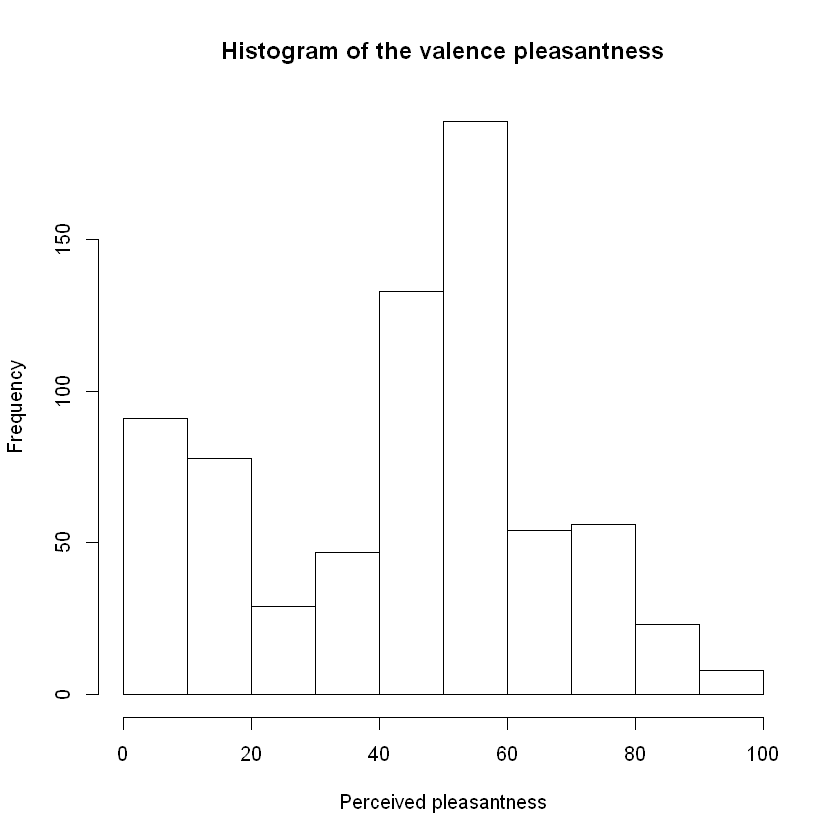

In [15]:
#observe the general distribution of pleasantness
hist(data$VALENCE.PLEASANTNESS, xlab="Perceived pleasantness",main="Histogram of the valence pleasantness")

#--> approximately normal with stronger left tail

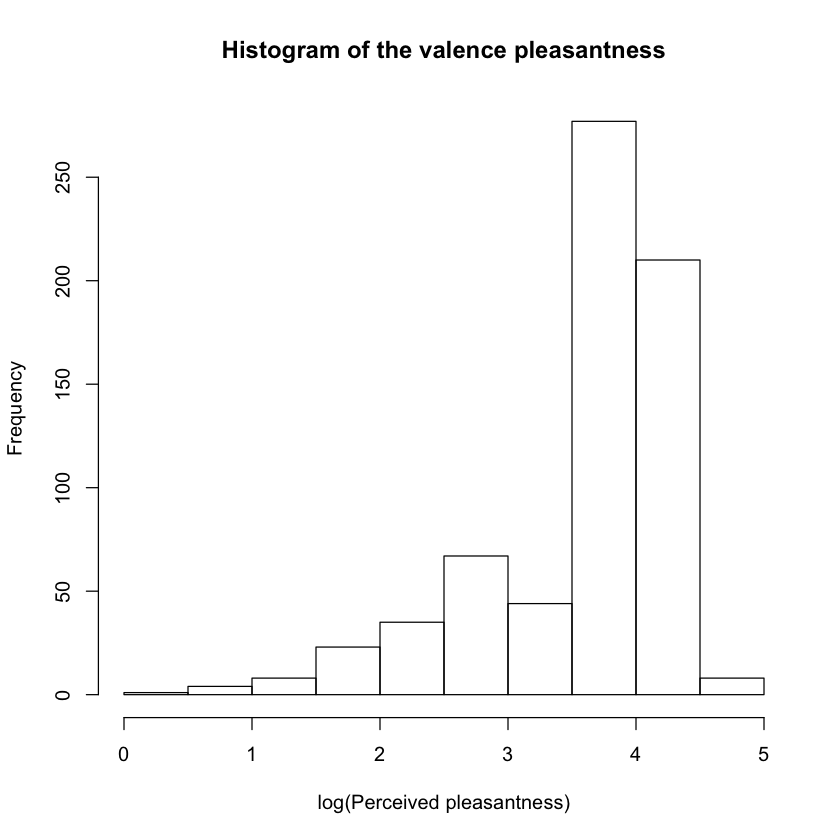

In [45]:
#The general distribution of the log(pleasantness) (jsp si c'est utile ??)

#install.packages("berryFunctions")
#library('berryFunctions')
hist(log(data$VALENCE.PLEASANTNESS), xlab="log(Perceived pleasantness)",main="Histogram of the valence pleasantness")
#logHist(data$VALENCE.PLEASANTNESS) 
#--> J'arrive pas à mettre l'echelle log sur l'axe des x ??
#--> We can see that the distribution of the log(pleasantness) linear until a certain level

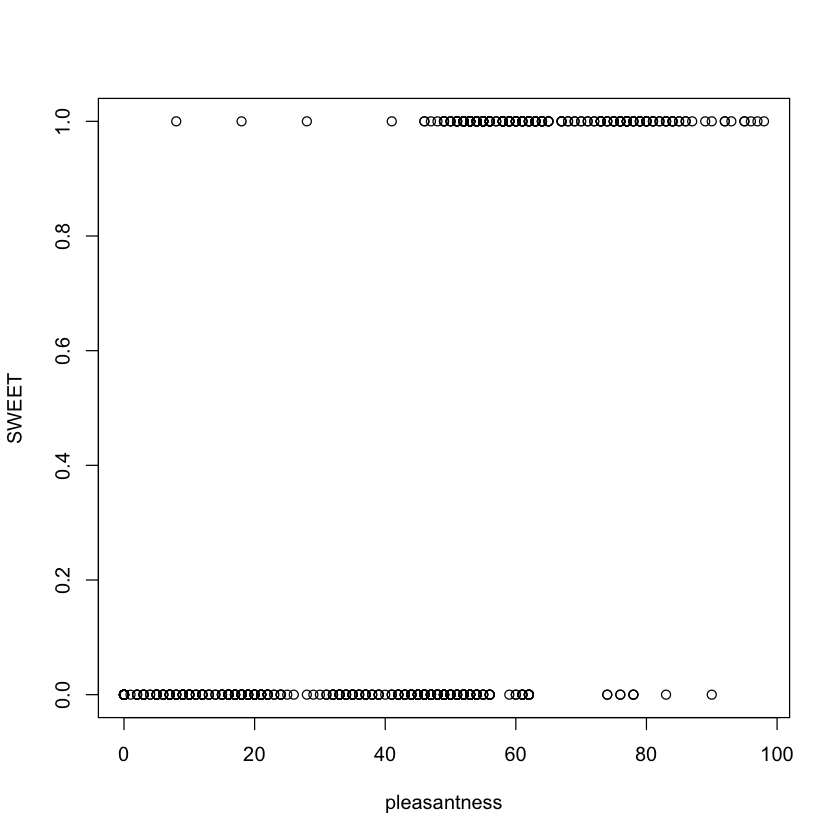

In [48]:
#verify if there is a  possible clear link between sweetORsour and pleasantness
plot(data$VALENCE.PLEASANTNESS,data$SWEETORSOUR,xlab="pleasantness", ylab="SWEET")

#--> we can see that there is a direct link between the pleasantness and if the odor is sweet or not
#--> The most pleasant odor tend to be more sweet and the less pleasant tend to be more sour even of there are some outliers
#--> It confirms the tendance that we saw with the 10th best and worst pleasent odors above

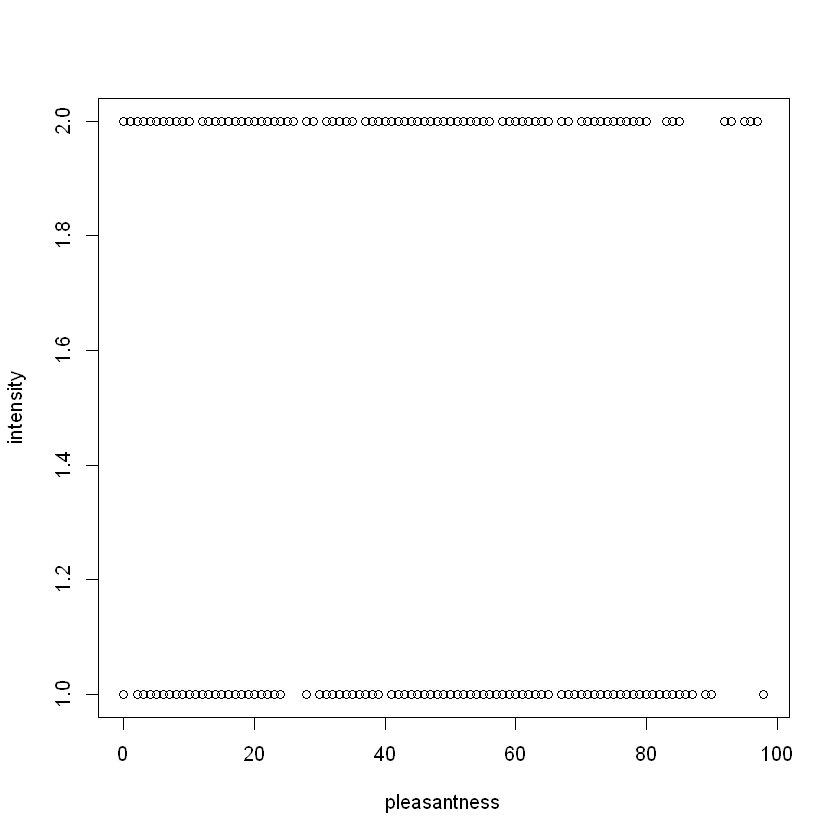

In [61]:
#verify if there is a  possible clear link between intensity and pleasantness
plot(data$VALENCE.PLEASANTNESS,as.factor(data$Intensity),xlab="pleasantness", ylab="intensity")

##--> no clear link

In [3]:
#try the general linear fit for MSE baseline
fit<-lm(VALENCE.PLEASANTNESS~., data)

In [4]:
summary(fit)



Call:
lm(formula = VALENCE.PLEASANTNESS ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.436  -8.186   0.324   8.018  37.814 

Coefficients: (4536 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -2.951e+07  5.396e+07  -0.547   0.5848    
Intensitylow            3.371e+00  1.199e+00   2.811   0.0052 ** 
SWEETORSOURTRUE         2.470e+01  1.897e+00  13.023   <2e-16 ***
complexity.from.pubmed -7.472e+02  1.086e+03  -0.688   0.4920    
MW                      4.927e+04  7.263e+04   0.678   0.4980    
AMW                     8.065e+02  3.943e+03   0.205   0.8381    
Sv                      2.050e+05  1.728e+05   1.186   0.2362    
Se                      1.898e+06  2.574e+06   0.737   0.4613    
Sp                     -7.953e+05  1.083e+06  -0.734   0.4633    
Si                      1.318e+06  2.011e+06   0.655   0.5127    
Mv                      4.220e+06  6.027e+06   0.700   0.4842 

In [1]:
#il y a bcp de NA dans les betas, est ce qu'il y a un moyen d'enlever les predictors dont le beta est NA pour avoir des données moins grandes ??
#summary(fit)$
        #les NA sont du a une grande colinearité entre prédicteurs, il faut tenter de voir les prédicteurs correlés

Summary:

Residual standard error: 15.9 on 372 degrees of freedom

Multiple R-squared:  0.7538,	Adjusted R-squared:  0.532 

F-statistic: 3.399 on 335 and 372 DF,  p-value: < 2.2e-16